In [1]:
# Allows us to import packages that exist one level up in the file system
# See https://stackoverflow.com/questions/34478398
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from tagnews.utils import load_data as ld
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.feature_extraction.text
import sklearn.multiclass
import sklearn.linear_model
% matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
df = ld.load_data()

/home/kevin/miniconda3/envs/cjp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Article Tags Exploration

In [4]:
print('# total articles       :', df.shape[0])
print('# tagged articles      :', df.loc[:, 'OEMC':'TASR'].any(1).sum())
print('# not relevant articles:', (~df['relevant']).sum())
print('# w/ no information    :', df.shape[0] - df.loc[:, 'OEMC':'TASR'].any(1).sum() - (~df['relevant']).sum())

# this number should be 0, but it isn't...
print('\n# articles tagged but not relevant :', (~df['relevant'] & df.loc[:, 'OEMC':'TASR'].any(1)).sum())

# total articles       : 357901
# tagged articles      : 37702
# not relevant articles: 167268
# w/ no information    : 152931

# articles tagged but not relevant : 2737


In [5]:
categories_df = ld.load_categories()
categories_df = categories_df.loc[:, ['abbreviation', 'category_name']]
categories_df.set_index('abbreviation', drop=True, inplace=True)

categories_df['counts'] = df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True)
categories_df.sort_values(by='counts')

category_name   counts
abbreviation                                                          
ENVI                                     Environmental Crimes     49.0
TASR                                      Police Use of Taser    120.0
OEMC          Office of Emergency Management & Communications    127.0
REEN                                                 Re-Entry    130.0
CPBD                                     Chicago Police Board    155.0
ILSC                                     Illinois State Court    179.0
CPUB                     Cook County Public Defender's Office    223.0
IMMG                                              Immigration    227.0
IDOC                       Illinois Department of Corrections    302.0
PROB                                                Probation    312.0
IPRA                      Independent Police Review Authority    360.0
BEAT             Beat Realignment / Police Resouce Allocation    377.0
ARSN                                                    Arson    397.0
PARL                                                   Parole    398.0
GLBTQ                                                   GLBTQ    511.0
POLB                                         Police Brutality    576.0
CPLY                                  Criminal Justice Policy    600.0
CCJ                                          Cook County Jail    900.0
ILSP                                    Illinois State Police    981.0
POLM                                        Police Misconduct   1077.0
DUI                               Driving Under the Influence   1279.0
BURG                                                 Burlgary   1373.0
CCSP                             Cook County Sheriff's Police   1453.0
FRUD                                                    Fraud   1576.0
CPS                                    Chicago Public Schools   1700.0
DOMV                                        Domestic Violence   1782.0
DRUG                                                    Drugs   2533.0
CCCC                                Cook County Circuit Court   2549.0
SEXA                                           Sexual Assault   2549.0
SAO                     Cook County State's Attorney's Office   3394.0
GANG                                                    Gangs   3512.0
JUVE                                                 Juvenile   3753.0
ROBB                                                  Robbery   5079.0
UNSPC                                       Unspecified Crime   9570.0
HOMI                                                Homicides  11302.0
GUNV                                             Gun Violence  13854.0
VIOL                                                 Violence  15848.0
CPD                                 Chicago Police Department  18446.0
COPA                Civilian Office for Police Accountability      NaN
DIGP                      Deputy Inspector General for Police      NaN

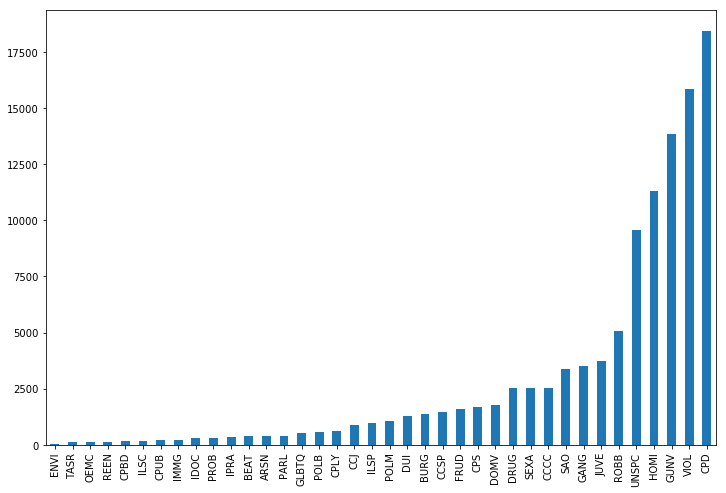

In [6]:
df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True).sort_values().plot(kind='bar');

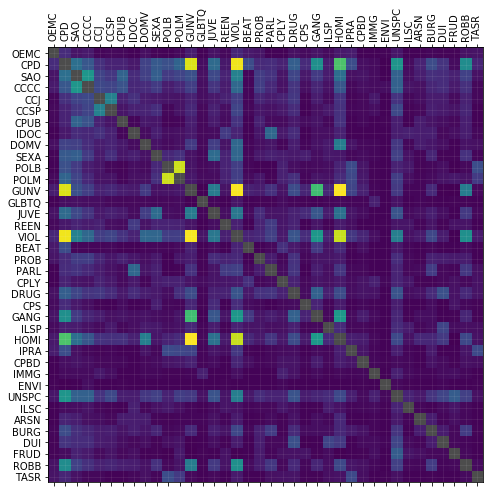

In [7]:
corrs = df.loc[:, 'OEMC':'TASR'].corr()
for i in range(corrs.shape[0]):
    corrs.iloc[i, i] = np.nan

cmap = matplotlib.cm.viridis
cmap.set_bad((.3, .3, .3),1.)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(np.ma.masked_invalid(corrs.values), cmap=cmap)

ax.grid(True, color=(.9, .9, .9), alpha=.1)

plt.xticks(range(len(corrs.columns)), corrs.columns, rotation=90);
plt.yticks(range(len(corrs.columns)), corrs.columns);

# Text Contents Exploration

In [8]:
# Print a random article just to see what they look like.
i = np.random.choice(df.shape[0])
print('ARTICLE ID:', df.index[i], '\n------------------')
print(df.iloc[i]['bodytext'])

ARTICLE ID: 326751 
------------------
** FOX NEWS ** \- The Iowa State Patrol caught a speeder going 144 mph on I-80 in the dark of night in early May. 

An image of the radar gun’s display was posted to the divison's Facebook page,
which said the unidentified car was spotted at the “blazing” speed during the
midnight shift, and added a warning to drivers that “a dark, open road is no
excuse for high speed.”

The type of car and driver’s identity were not identified, but The Des Moines
Register reports that the driver faces a $559.00 fine and possible suspension of
his or her license.

The Iowa State Patrol frequently uses Facebook to report on cars it catches
travelling at excessive speeds as a deterrent, pointing out the dangers and
punishments the drivers are subjecting themselves to.

[ ** Continue reading this story at FOXNews.com ** ][1]

   [1]: http://www.foxnews.com/auto/2017/05/30/iowa-police-catch-speeder-
going-144-mph.html


## Some questions:

* How to handle articles that talk about more than one crime (i.e. a summary of weekend violence)?
* Would we want the scraper to keep any more information going forward? Author name, for example?
* Do we want to have manually-defined cleaning built around the format? I.e. specifically remove the links at the bottom that are result of RSS format? 